### Importing libraries

In [6]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle

### Data Loading

In [168]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.shape

(7043, 21)

In [15]:
pd.set_option('display.max_columns', None)

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [170]:
#Dropping customerID

df = df.drop(columns=['customerID'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [172]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in df.columns:
    if col not in num_cols:
        print(col, df[col].unique())
        print('-'*25)

gender ['Female' 'Male']
-------------------------
SeniorCitizen [0 1]
-------------------------
Partner ['Yes' 'No']
-------------------------
Dependents ['No' 'Yes']
-------------------------
PhoneService ['No' 'Yes']
-------------------------
MultipleLines ['No phone service' 'No' 'Yes']
-------------------------
InternetService ['DSL' 'Fiber optic' 'No']
-------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
-------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
-------------------------
TechSupport ['No' 'Yes' 'No internet service']
-------------------------
StreamingTV ['No' 'Yes' 'No internet service']
-------------------------
StreamingMovies ['No' 'Yes' 'No internet service']
-------------------------
Contract ['Month-to-month' 'One year' 'Two year']
-------------------------
PaperlessBilling ['Yes' 'No']
-------------------------
PaymentMethod ['Electronic che

In [174]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [176]:
len(df[df['TotalCharges']==' '])

11

In [178]:
#Converting TotalCharges to int

df['TotalCharges'] = df['TotalCharges'].replace({' ': '0.0'})
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [180]:
#Checking class distribution

df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

**Insights:**

1. customerID columns has been removed as it is not needed for the modeling.
2. No missing values in the dataset.
3. Missing values in the column TotalCharges were replaced with 0.
4. Class imbalance identified in the target.

### Exploratory data analysis

In [182]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [184]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Numerical feature analysis

In [188]:
 def plot_hist(df, col_name):
     plt.figure(figsize=(6, 4))
     sns.histplot(df[col_name], kde=True)
     plt.title(f'Distribution of {col_name}')

     # Calculating mean and median for the columns
     
     col_mean = df[col_name].mean()
     col_median = df[col_name].median()

     #Adding vertical lines for mean and median

     plt.axvline(col_mean, color='orange', linestyle='--', label='Mean')
     plt.axvline(col_median, color='brown', linestyle='-', label='Median')

     plt.legend()
     plt.show()

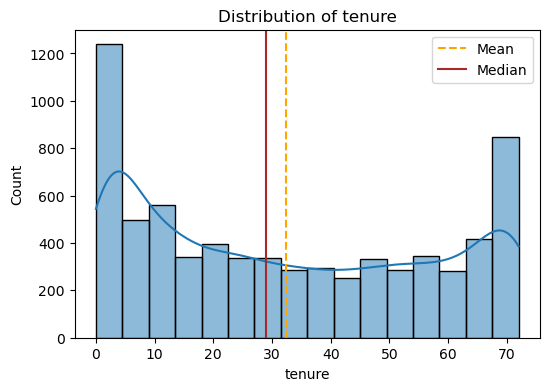

In [190]:
plot_hist(df, 'tenure')

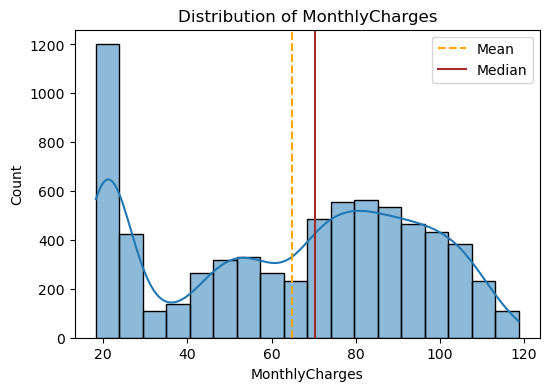

In [192]:
plot_hist(df, 'MonthlyCharges')

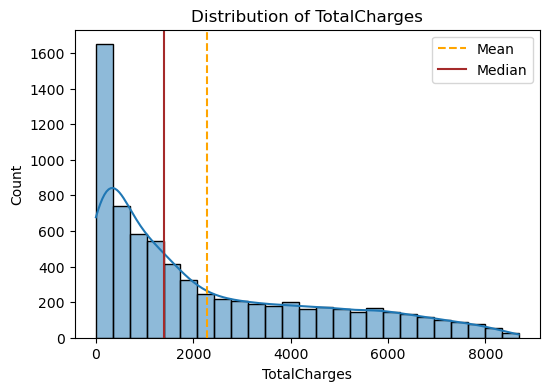

In [194]:
plot_hist(df, 'TotalCharges')

In [196]:
def plot_boxplot(df, col_name):
     plt.figure(figsize=(6, 4))
     sns.boxplot(y=df[col_name])
     plt.title(f'Distribution of {col_name}')
     plt.ylabel(col_name)
     plt.show()

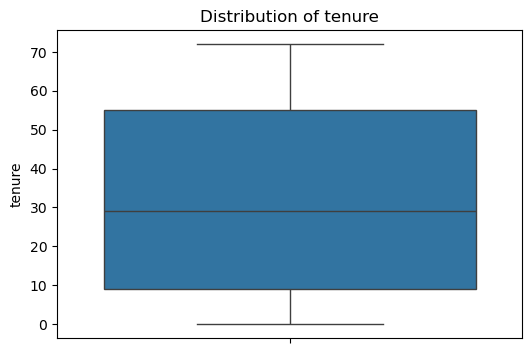

In [198]:
plot_boxplot(df, 'tenure')

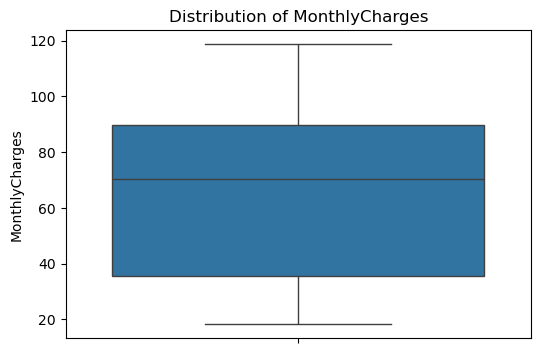

In [200]:
plot_boxplot(df, 'MonthlyCharges')

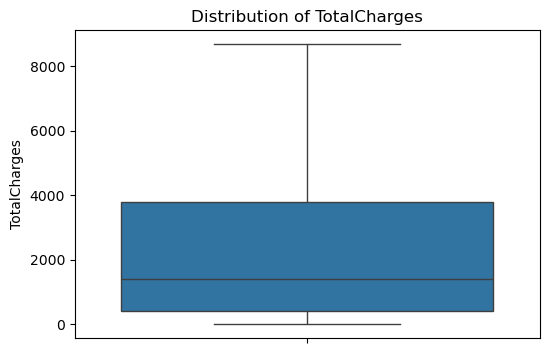

In [202]:
plot_boxplot(df, 'TotalCharges')

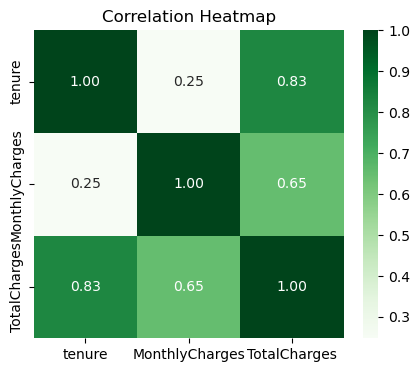

In [204]:
plt.figure(figsize=(5, 4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [206]:
cols = df.select_dtypes(include='object').columns.to_list()
cols = ['SeniorCitizen']+cols
cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

### Categorical feature analysis

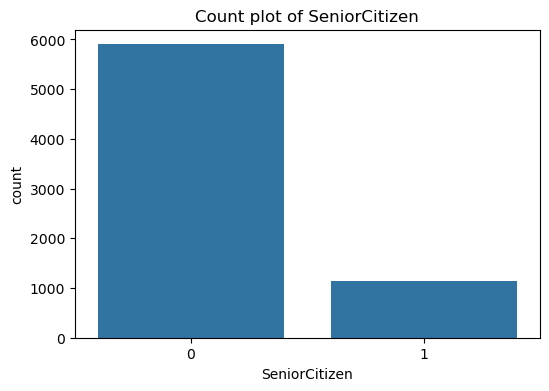

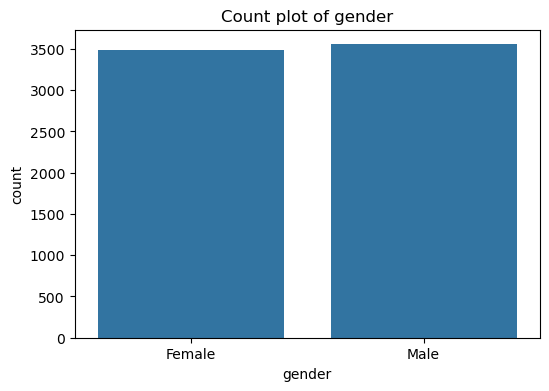

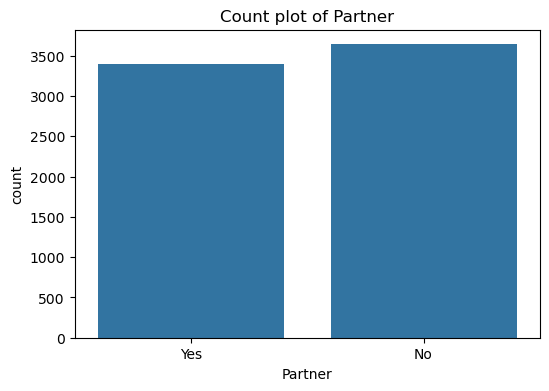

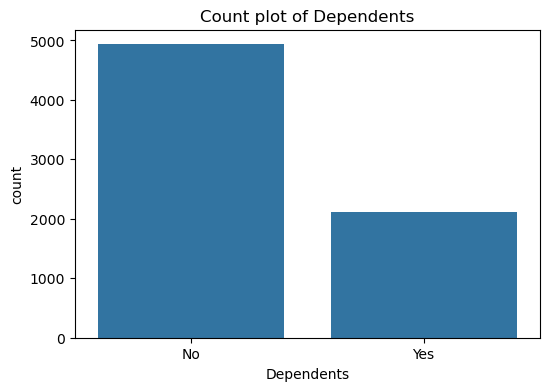

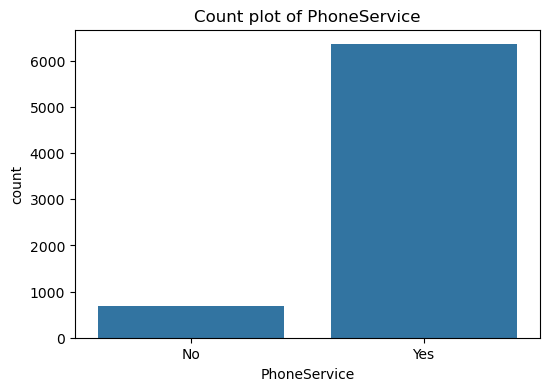

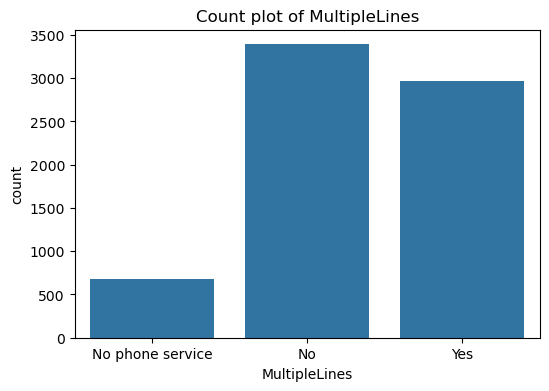

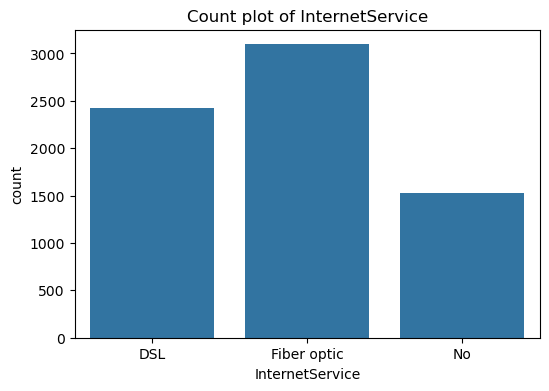

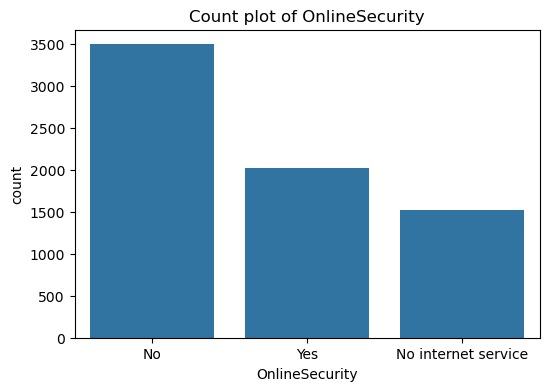

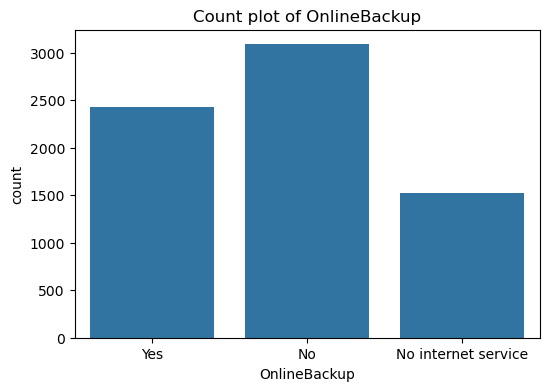

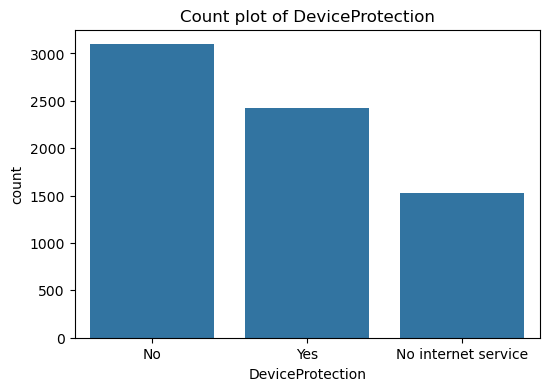

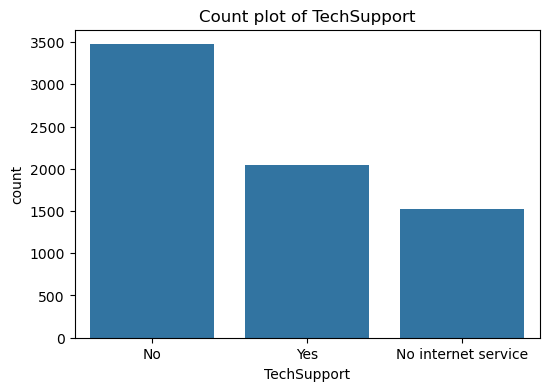

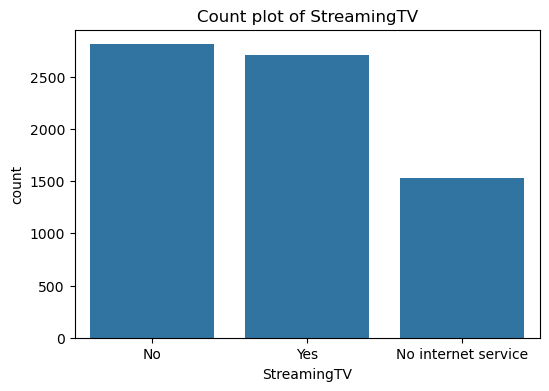

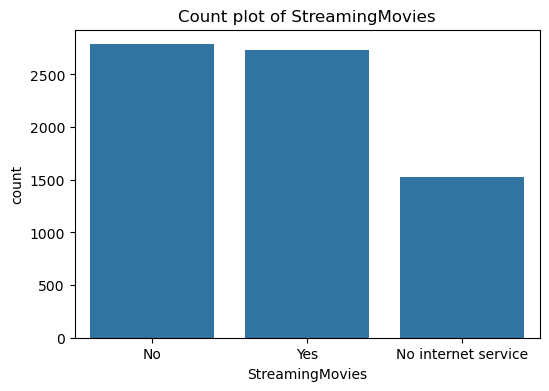

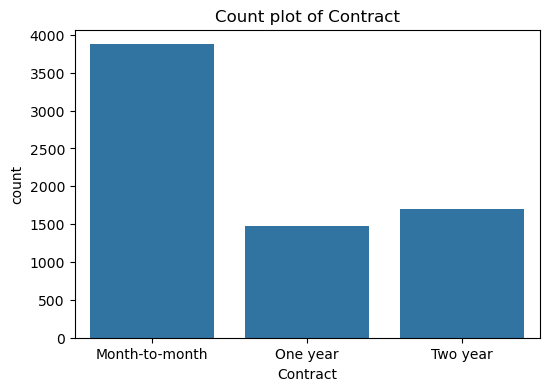

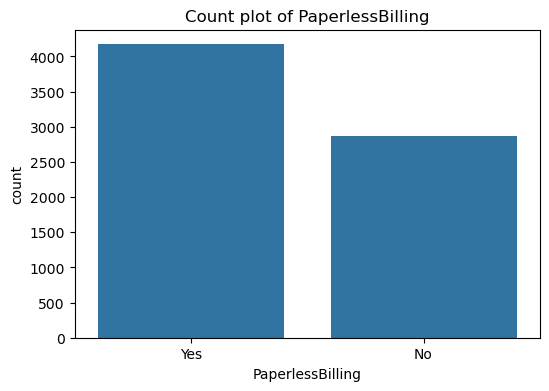

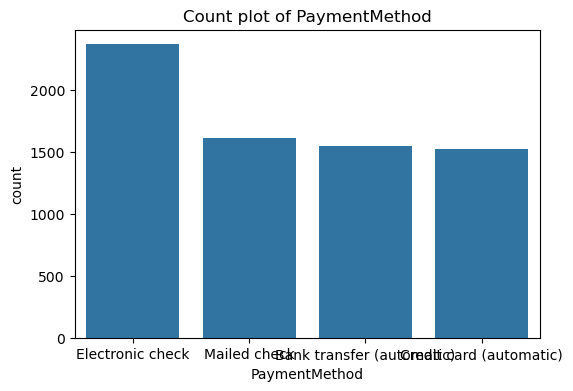

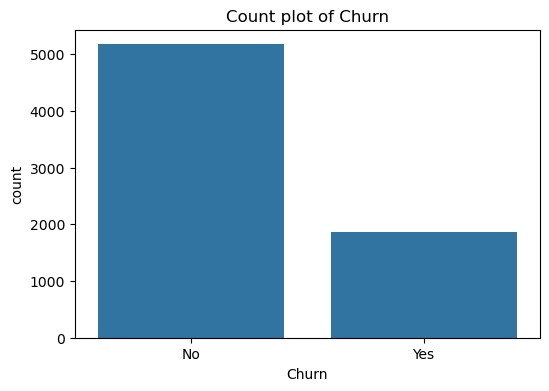

In [210]:
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f'Count plot of {col}')
    plt.show()

### Label encoding - target

In [212]:
df['Churn'] = df['Churn'].replace({'yes':1, 'no':0})
df['Churn'].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

### Label encoding - categorical features

In [214]:
cols = df.select_dtypes(include='object').columns.to_list()
cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [216]:
encoders = {}

#Applying label encoders

for col in cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    encoders[col] = label_encoder

with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoders, file)

In [218]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Splitting Data into Train-Test

In [220]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [222]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [224]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [227]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

### Applying SMOTE

In [234]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [238]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

### Model Training

In [241]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [249]:
cv_scores = {}

#5-fold cross validation

for model_name, model in models.items():
    print(f'Training {model_name} with default parameters')
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    cv_scores[model_name]= scores
    print(f'{model_name} cross validation accuracy: {np.mean(scores)}')
    print('-'*20)

Training Decision Tree with default parameters
Decision Tree cross validation accuracy: 0.7802198724404162
--------------------
Training Random Forest with default parameters
Random Forest cross validation accuracy: 0.8396703008012609
--------------------
Training XGBoost with default parameters
XGBoost cross validation accuracy: 0.8312132025628676
--------------------


In [251]:
cv_scores

{'Decision Tree': array([0.68055556, 0.71903323, 0.81752266, 0.84350453, 0.84048338]),
 'Random Forest': array([0.72826087, 0.77220544, 0.90453172, 0.89305136, 0.90030211]),
 'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

Random Forest model gives the highest accuracy compared to other model with default parameters

In [273]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

### Model evaluation

In [275]:
y_test.value_counts()

Churn
0    1036
1     373
Name: count, dtype: int64

In [277]:
y_test_pred = model.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_test_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
print('Classification report: \n', classification_report(y_test, y_test_pred))

Accuracy score:  0.7821149751596878
Confusion matrix: 
 [[876 160]
 [147 226]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1036
           1       0.59      0.61      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



### Saving Model

In [287]:
model_data = {'model': rf, 'feature_names': X.columns.tolist()}

with open('customer_churn_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

### Loading the Saved Model File

In [289]:
with open('customer_churn_model.pkl', 'rb') as file:
    model_data = pickle.load(file)

model = model_data['model']
feature_names = model_data['feature_names']

In [291]:
model

RandomForestClassifier(random_state=42)

In [293]:
feature_names

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']